## Task 3

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
customer_transactions = transactions.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).reset_index()


In [4]:
customer_profile = pd.merge(customers[['CustomerID', 'Region']], customer_transactions, on='CustomerID', how='left')

# Fill missing values for transaction features
customer_profile.fillna(0, inplace=True)

In [5]:
customer_profile = pd.get_dummies(customer_profile, columns=['Region'], drop_first=True)

In [6]:
## Feature Engineering / Scaling
scaler = StandardScaler()
profile_features = customer_profile.drop('CustomerID', axis=1)  # Drop 'CustomerID' for clustering
profile_scaled = scaler.fit_transform(profile_features)

In [7]:
db_indices = []
clusters_range = range(2, 11)


In [8]:
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    customer_profile['Cluster'] = kmeans.fit_predict(profile_scaled)
    
    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(profile_scaled, customer_profile['Cluster'])
    db_indices.append(db_index)


## Plotting / Visualisation

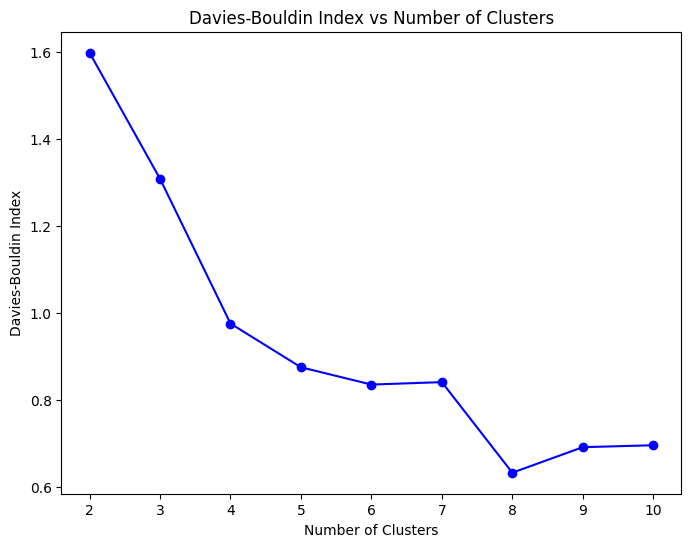

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(clusters_range, db_indices, marker='o', linestyle='-', color='b')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

In [10]:
best_n_clusters = clusters_range[db_indices.index(min(db_indices))]
print(f"Best number of clusters based on DBI: {best_n_clusters}")


Best number of clusters based on DBI: 8


In [11]:
kmeans_best = KMeans(n_clusters=best_n_clusters, random_state=42)
customer_profile['Cluster'] = kmeans_best.fit_predict(profile_scaled)


In [12]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(profile_scaled)


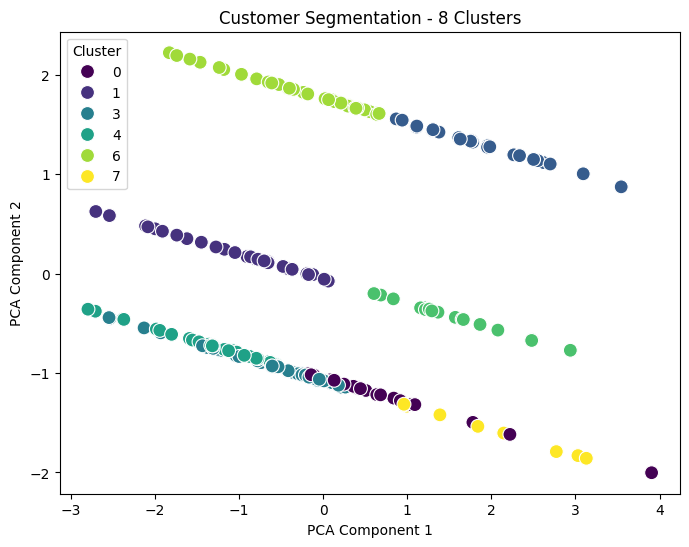

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_profile['Cluster'], palette="viridis", s=100)
plt.title(f'Customer Segmentation - {best_n_clusters} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [14]:
for i, db_index in enumerate(db_indices):
    print(f"Clusters: {clusters_range[i]}, Davies-Bouldin Index: {db_index:.4f}")

plt.show()


Clusters: 2, Davies-Bouldin Index: 1.5981
Clusters: 3, Davies-Bouldin Index: 1.3083
Clusters: 4, Davies-Bouldin Index: 0.9757
Clusters: 5, Davies-Bouldin Index: 0.8752
Clusters: 6, Davies-Bouldin Index: 0.8354
Clusters: 7, Davies-Bouldin Index: 0.8411
Clusters: 8, Davies-Bouldin Index: 0.6329
Clusters: 9, Davies-Bouldin Index: 0.6916
Clusters: 10, Davies-Bouldin Index: 0.6960
